In [0]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/images.zip

--2020-04-09 07:38:44--  https://fmi-unibuc-ia.github.io/ia/Data/images.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.110.153, 185.199.108.153, 185.199.109.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373898 (1.3M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   1.31M  --.-KB/s    in 0.05s   

2020-04-09 07:38:44 (25.1 MB/s) - ‘images.zip’ saved [1373898/1373898]



In [0]:
!unzip images.zip

Archive:  images.zip
  inflating: images/car_0.npy        
  inflating: images/car_1.npy        
  inflating: images/car_2.npy        
  inflating: images/car_3.npy        
  inflating: images/car_4.npy        
  inflating: images/car_5.npy        
  inflating: images/car_6.npy        
  inflating: images/car_7.npy        
  inflating: images/car_8.npy        


In [0]:
from pathlib import Path
import numpy as np

In [0]:
# încarc toate imaginiile din director
image_dir = Path("images/")

images = []
for image_path in image_dir.glob("*.npy"):
    image = np.load(image_path)
    images.append(image)

# transform într-un array
images = np.array(images)

# afișez dimensiunile imaginii
images.shape

(9, 400, 600)

In [0]:
# Suma tuturor pixelilor
#   `axis == None` înseamnă că iau toate valorile și le adun
np.sum(images, axis=None)

269782418

In [0]:
# Suma tuturor pixelilor per imagine
#   `axis == (1, 2)` înseamnă că pentru fiecare imagine (axa 0),
#   fac suma tuturor elementelor pe axele 1 și 2 (adică toți pixelii pe lățime
#   și înălțime)
sums = np.sum(images, axis=(1, 2))

for index, pixel_sum in enumerate(sums):
    print(f"Image #{index}:", pixel_sum)

Image #0: 28685144
Image #1: 29317095
Image #2: 26884392
Image #3: 39333369
Image #4: 32168248
Image #5: 22033563
Image #6: 33514492
Image #7: 35118308
Image #8: 22727807


In [0]:
# Indexul imaginii cu suma maxima
# argmax returnează indicele elementului maxim
np.argmax(sums)

3

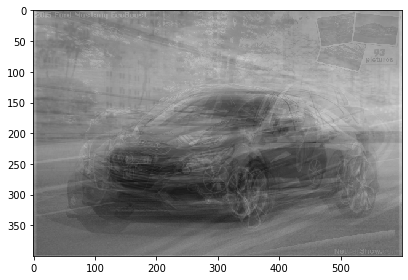

In [0]:
# Afișarea imaginii medii

from skimage import io

# calculez imaginea medie
mean_image = np.mean(images, axis=0)

# afișare (cu codul din laborator)
io.imshow(mean_image.astype(np.uint8))
io.show()

In [0]:
# Deviația standard a imaginilor
sd = np.std(images)
sd

67.4579383573686

In [0]:
# Normalizez imaginile
# folosesc broadcasting ca să scad imaginea medie din fiecare imagine
normalized_images = (images - mean_image) / sd

# După normalizare, media o să fie aproape de 0
# și deviația standard mai aproape de 1
print(np.mean(normalized_images), np.std(normalized_images))

7.579122514774402e-18 0.8365096370550695


In [0]:
# Decupez imaginile

# cu [:] aplic operația pe toate imaginile,
# apoi selectez liniile și coloanele dorite
cut_images = normalized_images[:, 200:300, 280:400]

# afișez noile dimeniuni
cut_images.shape

(9, 100, 120)